# Рынок заведений общественного питания Москвы

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

### Навигация

1. [Загрузка данных и их предобработка](#start)
2. [Анализ данных](#analis)
3. [Топ-10 улиц/районов по количеству объектов общественного питания](#top_10)
4. [Вывод](#end)
5. [Рекомендации инвесторам](#investor)


## Шаг №1. <a id="start"></a> Загрузка данных и их предобработка

In [80]:
# импорт необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import re
plt.style.use('seaborn-darkgrid')

from scipy import stats as st
from plotly.subplots import make_subplots

pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', -1)

In [81]:
rest_data = pd.read_csv('/datasets/rest_data.csv') 
# сохраним полученную таблицу в переменную rest_data

rest_data.info() 
# типы данных соответствуют содержанию столбцов

rest_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [82]:
# проверка на уникальность содержимого столбов, отсутствие значений, вносящих неурядицу в данные
rest_data['chain'].unique()

# заменим значения в столбце chain с да/нет на сетевое/несетевое
rest_data['chain'] = rest_data['chain'].replace('да', 'сетевое заведение').replace('нет', 'несетевое заведение')
rest_data.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,несетевое заведение,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,несетевое заведение,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,несетевое заведение,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,сетевое заведение,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,несетевое заведение,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,несетевое заведение,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240
6,148815,Брусника,сетевое заведение,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,несетевое заведение,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90
8,20958,КПФ СЕМЬЯ-1,несетевое заведение,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150
9,28858,Столовая МТУСИ,несетевое заведение,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120


In [83]:
rest_data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [84]:
rest_data['number'].unique() # есть заведения с количеством мест - 0

array([  48,   35,   95,   40,   50,  240,   10,   90,  150,  120,    5,
         24,  140,   32,  270,  320,    7,    2,  160,   20,   30,  110,
          6,  192,   65,   45,    4,  125,  100,   49,   63,   70,   22,
         56,   38,  220,   78,    3,   80,   46,   15,   96,   60,   47,
        180,  250,  200,   25,   12,   14,   16,  420,   98,   75,   34,
        216,   43,   54,  580,  159,    0,   28,   64,   67,   42,  124,
         82,   36,  114,    8,   71,   18,  158,   55,  196,   44,   76,
        144,   41,   26,   68,  143,  198,   79,    1,   86,  148,  190,
        202,  131,   52,   92,  300,   85,  102,   88,   84,  246,   81,
         94,   23,   37,   39,   99,   61,   11,  130,   74,  128,  106,
         58,  260,   27,   19,   29,   13,    9,  168,  350,   93,   33,
        105,  239,  104,   17,   62,  230,  132,   87,   89,  170,   83,
         21,  108,  210,   51,   53,  115,   66,  280,  126,   97,  356,
        156,  428,  380,  138,   72,  118,  139,  2

In [85]:
rest_data.query('number == 0').head(10) 
# исходя из списка видно, что в основном это места с выносом еды с собой. 
# такие сведения можно оставить для полноты картиры рынка общепита города

,id,object_name,chain,object_type,address,number
137,115498,Пекарня & Донер,несетевое заведение,закусочная,"город Москва, Бутырская улица, дом 9, корпус 2",0
154,152556,Шаурма в пите,несетевое заведение,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0
157,149568,Суши,несетевое заведение,предприятие быстрого обслуживания,"город Москва, улица Маршала Василевского, дом 3, корпус 1",0
190,126956,"Шаурма, куры-гриль",несетевое заведение,предприятие быстрого обслуживания,"город Москва, 1-я Владимирская улица, дом 21",0
195,149531,"Шаурма, куры-гриль",несетевое заведение,предприятие быстрого обслуживания,"город Москва, 2-я Владимирская улица, дом 44/10",0
198,124201,"Шаурма, выпечка",несетевое заведение,предприятие быстрого обслуживания,"город Москва, 3-я Владимирская улица, дом 27",0
206,150836,ГБОУ Школа №1468,несетевое заведение,столовая,"город Москва, Волгоградский проспект, дом 17, строение 1",0
219,156226,Суши-шоп,несетевое заведение,закусочная,"город Москва, Волоколамское шоссе, дом 92",0
240,154738,Пекарня,несетевое заведение,предприятие быстрого обслуживания,"город Москва, улица Гастелло, дом 37",0
278,25742,БИСТРО,несетевое заведение,предприятие быстрого обслуживания,"город Москва, Тверская улица, дом 27, строение 1",0


In [86]:
# приведем содержания столбцов object_name и address к нижнему регистру для прверки на наличие дубликтов
rest_data['object_name'] = rest_data['object_name'].str.lower()
rest_data['address'] = rest_data['address'].str.lower()

In [87]:
# проверка на наличие полных дубликатов
rest_data.duplicated().sum() # дубликаты отсутствуют

0

In [88]:
rest_data.isna().sum() # пустые значения отсутствуют

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

#### Вывод
Полученный для анализа файл сохранен в переменную rest_data, содержащую следующую информацю:
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

Проверив данные на наличие пропусков, повторов и правильность типов данных, можно приступить к их анализу.

## Шаг №2. <a id="analis"></a> Анализ данных


#### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

In [89]:
# представим такое соотношение в виде круговой диаграммы
labels = rest_data['object_type'].value_counts().index
values = rest_data['object_type'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull = [0.1, 0, 0, 0],\
                             title = 'Соотношение видов объектов общественного питания по количеству')])

fig.show()

Большую часть заведений в городе составляют кафе (40%) - это примерно столько же, сколько столовые, рестораны и фастфуд вместе взятые!

#### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [90]:
# представим такое соотношение в виде круговой диаграммы
labels = rest_data['chain'].value_counts().index
values = rest_data['chain'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull = [0.1, 0, 0, 0],\
                             title = 'Соотношение  сетевых и несетевых заведений по количеству')])

fig.show()

80,7% заведений в городе составляют несетевые места. Печальная статистика для KFC, Макдональдс и остального фастфуда.

#### Для какого вида объекта общественного питания характерно сетевое распространение?

In [91]:
chain_rest = (rest_data
             .pivot_table(index='object_type', columns='chain', values='object_name', aggfunc='count')
             .reset_index()
             )
chain_rest.columns=['object_type', 'no_chain', 'chain']

# создадим столбец chain_share, показывающий долю заведений с сетевым распределением
chain_rest['chain_share'] = chain_rest['chain'] / (chain_rest['no_chain'] + chain_rest['chain'])
chain_rest = chain_rest.sort_values(by='chain_share', ascending=False)

In [92]:
# график, показывающий распределение заведений общественного питания Москвы по принципу сетевого распространения

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=chain_rest['object_type'], y=chain_rest['no_chain'], name="Несетевые заведения"),
    secondary_y=False)

fig.add_trace(
    go.Scatter(x=chain_rest['object_type'], y=chain_rest['chain'], name="Сетевые заведения"),
    secondary_y=False)

fig.update_layout(
    title_text="Соотношение общепита Москвы по принципу сетевого распределения")

fig.update_xaxes(title_text="Тип заведения общественного питания")
fig.show()

In [93]:
# график доли сетевых предприятий общественного питания в Москве

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=chain_rest['object_type'], y=chain_rest['chain_share'], name="Несетевые заведения"),
    secondary_y=False)

fig.update_layout(
    title_text="Доля сетевых предприятий общественного питания в Москве")

fig.update_xaxes(title_text="Тип заведения общественного питания")
fig.show()

Выводы:
1. Сетевое распределение в большей степени характерно для предприятий быстрого обслуживания (41%).
2. Сетевое распределение в равной степени характерно для кафе (22,8%) и ресторанов (23,7%).
3. Наименее подвержены сетевому распределению бары, буфеты и столовые. Доля сетевых заведений среди своего типа составляет менее 5%.


#### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [94]:
chain_rest_stat = (rest_data
             .query('chain == "сетевое заведение"')
             .pivot_table(index='number', values='object_name', aggfunc='count')
             .reset_index())
chain_rest_stat.columns=['numbers', 'count']


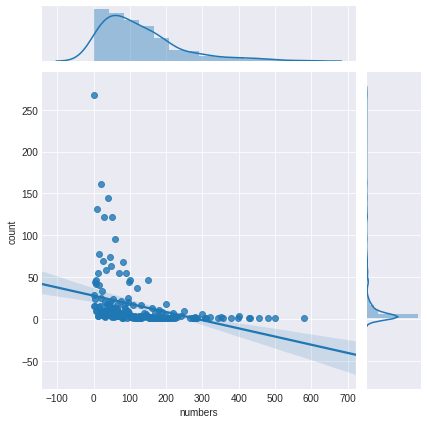

In [95]:
sns.jointplot(x="numbers", y="count", data=chain_rest_stat, kind='reg')

Исходя из графика следует, что более предпочтительным является большое количество заведений с небольшим количеством мест.

#### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.


                         object_type      number
8  столовая                           130.246618
7  ресторан                           96.834136 
1  буфет                              51.129915 
0  бар                                43.494159 
3  кафе                               39.716019 
6  предприятие быстрого обслуживания  20.552262 
4  кафетерий                          9.123116  
2  закусочная                         7.608333  
5  магазин (отдел кулинарии)          5.589744  


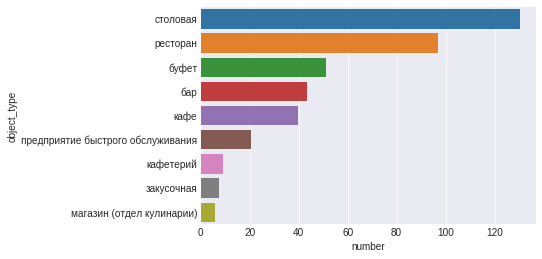

In [96]:
rest_data_middle = (rest_data
                    .pivot_table(index='object_type', values='number')
                    .reset_index()
                    .sort_values(by='number', ascending=False))
print(rest_data_middle)
sns.barplot(x="number", y="object_type", data=rest_data_middle)

В среднем больше всего посадочных мест в столовых (130), немного меньше в ресторанах (96), меньше всего посадочных места делают в магазине (отдел кулинарии) - 5 и в закусочных - 7. Как ранее выявляли, такие типы заведений могут иметь в том числе и 0 посадочных мест, потому что люди любят покупать шаверму с собой и есть ее по дороге к месту назначения.

#### Выделите в отдельный столбец информацию об улице из столбца address

In [97]:
# создадим небольшую функцию, которая из списка адресов оставит только улицы (включая проспекты и т.д.), 
# поскольку хотя из условия задания и не следует это, то считаю необходимым изучать размещение мест питания по всему городу

def street(x):
    match = re.search('[^,]*,([^,]*),', x)
    if match:
        return match.group(1)
    
rest_data['street'] = rest_data['address'].apply(street)
rest_data.dropna(inplace=True)
rest_data['street']= rest_data['street'].apply(lambda x: x.lstrip())
rest_data.head(10)

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,несетевое заведение,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,несетевое заведение,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,несетевое заведение,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,сетевое заведение,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,несетевое заведение,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
5,27429,стол. при гоу сош № 1051,несетевое заведение,столовая,"город москва, абрамцевская улица, дом 15, корпус 1",240,абрамцевская улица
6,148815,брусника,сетевое заведение,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,переулок сивцев вражек
7,20957,буфет мтуси,несетевое заведение,столовая,"город москва, авиамоторная улица, дом 8, строение 1",90,авиамоторная улица
8,20958,кпф семья-1,несетевое заведение,столовая,"город москва, авиамоторная улица, дом 8, строение 1",150,авиамоторная улица
9,28858,столовая мтуси,несетевое заведение,столовая,"город москва, авиамоторная улица, дом 8, строение 1",120,авиамоторная улица


Улицы были выделены в отдельный столбец, теперь по ним можно смотреть инфограффику размешения мест питания в Москве.

#### <a id="top_10"></a> Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?


In [98]:
# для ответа на первую часть вопроса получим сводную таблцу, в которой пересчитаем число мест питания для каждой улицы 
# и оставим первые 10
streets = (rest_data
           .pivot_table(index='street', values='object_name', aggfunc='count')
           .sort_values(by='object_name', ascending=False)
           .reset_index()
           )
streets.columns = ['street', 'rest_count']
streets.head(10)

,street,rest_count
0,город зеленоград,232
1,проспект мира,204
2,профсоюзная улица,182
3,ленинградский проспект,171
4,пресненская набережная,167
5,варшавское шоссе,161
6,ленинский проспект,147
7,поселение сосенское,138
8,проспект вернадского,132
9,кутузовский проспект,114


In [99]:
# в данные закралась ошибка. Хотя г.Зеленоград это один из 12 административных округов Москвы, он не является улицей
# и не может с ними сравниваться, поэтому нужно такие данные исключить (а также и пос. Сосенское) и составить новый топ 10
streets = (rest_data
           .query('street != "город зеленоград" and street != "поселение сосенское"')
           .pivot_table(index='street', values='object_name', aggfunc='count')
           .sort_values(by='object_name', ascending=False)
           .reset_index()
           )
streets.columns = ['street', 'rest_count']
top10 = streets.head(10)
top10

,street,rest_count
0,проспект мира,204
1,профсоюзная улица,182
2,ленинградский проспект,171
3,пресненская набережная,167
4,варшавское шоссе,161
5,ленинский проспект,147
6,проспект вернадского,132
7,кутузовский проспект,114
8,каширское шоссе,112
9,кировоградская улица,110


In [100]:
# визуализируем данных в графике
fig_street = px.bar(top10, x='street', y='rest_count', title='Топ-10 улиц Москвы по количеству объектов общественного питания')
fig_street.update_xaxes(tickangle=30)
fig_street.show()

In [101]:
# импортируем информацию о принадлежности улиц районам Москвы
areas = pd.read_csv('moscow_all_streets_final.csv')
areas.head(10)

,city,district,street,adm_area
0,город Москва,муниципальный округ Чертаново Южное,Варшавское шоссе,Южный административный округ
1,город Москва,муниципальный округ Вешняки,Косинская улица,Восточный административный округ
2,город Москва,муниципальный округ Басманный,Гороховский переулок,Центральный административный округ
3,город Москва,муниципальный округ Метрогородок,Тагильская улица,Восточный административный округ
4,город Москва,муниципальный округ Сокол,Ленинградский проспект,Северный административный округ
5,город Москва,муниципальный округ Рязанский,улица Вострухина,Юго-Восточный административный округ
6,город Москва,муниципальный округ Войковский,улица Космонавта Волкова,Северный административный округ
7,город Москва,муниципальный округ Аэропорт,Балтийская улица,Северный административный округ
8,город Москва,муниципальный округ Люблино,улица Головачёва,Юго-Восточный административный округ
9,город Москва,муниципальный округ Замоскворечье,Климентовский переулок,Центральный административный округ


In [102]:
# оставим только то, что необходимо для ответа на поставленные задачи
areas = areas[['street', 'district']]
areas['district'] = areas['district'].str.lower()
areas['street'] = areas['street'].str.lower()
areas.head(10)

,street,district
0,варшавское шоссе,муниципальный округ чертаново южное
1,косинская улица,муниципальный округ вешняки
2,гороховский переулок,муниципальный округ басманный
3,тагильская улица,муниципальный округ метрогородок
4,ленинградский проспект,муниципальный округ сокол
5,улица вострухина,муниципальный округ рязанский
6,улица космонавта волкова,муниципальный округ войковский
7,балтийская улица,муниципальный округ аэропорт
8,улица головачёва,муниципальный округ люблино
9,климентовский переулок,муниципальный округ замоскворечье


In [103]:
top10district = top10.merge(areas, how='inner')
top10district = top10district.drop_duplicates().reset_index(drop = True)

In [104]:
top10district = (top10district
                 .pivot_table(index='district', values='street', aggfunc='count')
                 .sort_values(by='street', ascending=False)
                 .reset_index()
           )
top10district.columns = ['district', 'district_count']                 
top10district = top10district.head(10)
top10district

,district,district_count
0,муниципальный округ гагаринский,3
1,муниципальный округ проспект вернадского,2
2,муниципальный округ ломоносовский,2
3,муниципальный округ теплый стан,2
4,муниципальный округ тропарево-никулино,2
5,муниципальный округ обручевский,2
6,муниципальный округ нагатино-садовники,2
7,муниципальный округ чертаново центральное,2
8,муниципальный округ чертаново северное,2
9,муниципальный округ чертаново южное,2


In [105]:
# визуализируем данных в графике
fig_street = px.bar(top10district, x='district', y='district_count', title='Топ-10 районов Москвы по количеству объектов общественного питания')
fig_street.update_xaxes(tickangle=30)
fig_street.show()

#### Вывод 
Исходя из полученной информации можно сделать вывод, что больше всего объектов питания расположено на протяженных магистралях, который пересекают множество районов Москвы. Больше всего заведений расположено на пр.Мира (192), Ленинградском пр. (158) и Пресненской наб. (156).

Среди районов, включающих 10 самых популярных улиц для размещения точек питания, больше всего мест точек питания в Гагаринском районе (3 улицы), а также в районах - Тропарево-Никулино, Обручевский, Донской, Теплый стан, Нагатино-Садовники, Ломоносовский (по 2 улицы), Свиблово, Северное Бутово (по 1).

#### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?


In [106]:
onePlace = streets.query('rest_count == 1')
onePlace.count() # всего 579 улиц с одни заведением

street        571
rest_count    571
dtype: int64

In [107]:
# Добавим информацию о районах
onePlaceDistrict = areas.merge(onePlace, how='inner')
onePlaceDistrict = onePlaceDistrict.drop_duplicates().reset_index(drop = True)
onePlaceDistrict.head(10)

,street,district,rest_count
0,балтийская улица,муниципальный округ аэропорт,1
1,балтийская улица,муниципальный округ сокол,1
2,улица недорубова,муниципальный округ некрасовка,1
3,7-я улица лазенки,муниципальный округ ново-переделкино,1
4,хавская улица,муниципальный округ даниловский,1
5,хавская улица,муниципальный округ донской,1
6,1-й сетуньский проезд,муниципальный округ раменки,1
7,жуков проезд,муниципальный округ даниловский,1
8,жуков проезд,муниципальный округ замоскворечье,1
9,улица знаменские садки,муниципальный округ северное бутово,1


In [108]:
onePlaceDistrict = (onePlaceDistrict
                 .pivot_table(index='district', values='street', aggfunc='count')
                 .sort_values(by='street', ascending=False)
                 .reset_index()
           )
onePlaceDistrict.columns = ['district', 'district_count']                 
onePlaceDistrict = onePlaceDistrict.head(10)
onePlaceDistrict

,district,district_count
0,муниципальный округ таганский,29
1,муниципальный округ хамовники,26
2,муниципальный округ басманный,24
3,муниципальный округ тверской,23
4,муниципальный округ пресненский,19
5,муниципальный округ марьина роща,18
6,муниципальный округ замоскворечье,15
7,муниципальный округ сокольники,15
8,муниципальный округ мещанский,15
9,муниципальный округ арбат,14


In [109]:
# визуализируем данных в графике
fig_street = px.bar(onePlaceDistrict, x='district', y='district_count', title='Топ-10 районов Москвы, где на улицах размещено по одному объекту питания')
fig_street.update_xaxes(tickangle=30)
fig_street.show()

#### Вывод
В Москве обнаружено целых 579 улиц, на которых не более 1 места питания. При этом если посмотреть на районы, больше всего таких улиц в Таганском (28), Хамовники (26) и Басманных (24) районах и т.д.

#### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [110]:
placePerStreet = top10.merge(rest_data)
placePerStreet.head(10)

,street,rest_count,id,object_name,chain,object_type,address,number
0,проспект мира,204,149899,сухарева башня,несетевое заведение,кафе,"город москва, проспект мира, дом 5, корпус 1",10
1,проспект мира,204,69300,ваби-саби,сетевое заведение,кафе,"город москва, проспект мира, дом 29",64
2,проспект мира,204,71378,шоколадница,сетевое заведение,кафе,"город москва, проспект мира, дом 29",40
3,проспект мира,204,146123,джаганнат,сетевое заведение,кафе,"город москва, проспект мира, дом 31",25
4,проспект мира,204,137644,krispy creme,сетевое заведение,кафе,"город москва, проспект мира, дом 40",36
5,проспект мира,204,128970,французская пекарня,несетевое заведение,кафе,"город москва, проспект мира, дом 47, строение 1",16
6,проспект мира,204,150870,prime прайм стар,сетевое заведение,кафе,"город москва, проспект мира, дом 48, строение 6",32
7,проспект мира,204,111162,брусника,сетевое заведение,кафе,"город москва, проспект мира, дом 49",40
8,проспект мира,204,156605,азбука вкуса,сетевое заведение,кафе,"город москва, проспект мира, дом 49",20
9,проспект мира,204,26026,an nam,несетевое заведение,ресторан,"город москва, проспект мира, дом 54",60


In [111]:
placePerStreet = (placePerStreet
             .pivot_table(index='number', values='object_name', aggfunc='count')
             .reset_index())
placePerStreet.columns=['numbers', 'count']

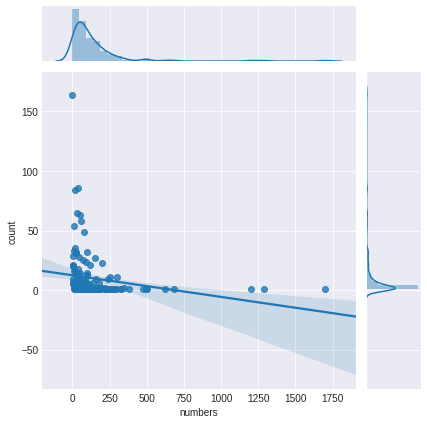

In [112]:
sns.jointplot(x="numbers", y="count", data=placePerStreet, kind='reg')

Исходя из полученного графика распределения следует, что большинство заведений общественного питания в Москве на основных магистралях имею до 250-300 посадочных мест.

## Шаг №3. Презентация

Презентация и файл для объединения таблиц расположен в папке с проектом

## <a id="end"></a> Вывод 

Полученный для анализа содержал следующую информацию:
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

В процессе подготовки данных к анализу из общего объема информации были исключены сведения об заведениях общественного питания, не имеющие посадочных мест, поскольку такие места не могут быть конкурентами нашему роботокафе, имеющему посадочные места.

В ходе анализа было выявлено, что большую часть заведений в городе составляют кафе (42%) - это примерно столько же, сколько столовые, рестораны и фастфуд вместе взятые!

При этом из общего объема данных почти 81% заведений в городе составляют несетевые места.

Следовательно, сетевое распространение в большей степени характерно для предприятий быстрого обслуживания.

Построив график распределения получен вывод, что более предпочтительным для предприятий общественного питания Москвы является размещение большого количества заведений с небольшим количеством мест.

В среднем больше всего посадочных мест в столовых (130), немного меньше в ресторанах (96), меньше всего посадочных места делают в магазине (отдел кулинарии) - 5 и в закусочных - 7. Как ранее выявляли, такие типы заведений могут иметь в том числе и 0 посадочных мест, потому что люди любят покупать шаверму с собой и есть ее по дороге к месту назначения.

При этом, выделив улицы из адреса в отдельный столбец, был составлен перечень улиц, на которых размещено больше всего объектов питания. В основном к таким относятся протяженные магистрали, который пересекают множество районов Москвы. Больше всего заведений расположено на пр.Мира (192), Ленинградском пр. (158) и Пресненской наб. (156).

Среди районов, включающих 10 самых популярных улиц для размещения точек питания, больше всего мест точек питания в Гагаринском районе (3 улицы), а также в районах - Тропарево-Никулино, Обручевский, Донской, Теплый стан, Нагатино-Садовники, Ломоносовский (по 2 улицы), Свиблово, Северное Бутово (по 1).

Особо примечательно, что в Москве обнаружено целых 579 улиц, на которых не более 1 места питания. При этом если посмотреть на районы, больше всего таких улиц в Таганском (28), Хамовники (26) и Басманном (24) районах и т.д.

Построив график распределения количества мест общественного питания на основных магистралях следует, что большинство заведений общественного питания в Москве имею до 250-300 посадочных мест.

### <a id="investor"></a> Рекомендации инвесторам
Следовательно, инвесторам, желающим открыть робото-кафе в Москве, можно дать следующие рекомендации:
1. Более предпочтительным типом заведения считается ресторан. Конкуренция в сегменте кафе достаточно высока, при это высокотехнологичное предприятие изначально предполагает большие инвестиции и более высокий уровень кухни, чем просто кафе.
2. Поскольку в основном по городу не распространены сетевые заведения, целесообразно запустить один ресторан, а постепенно расширять его в сеть, чтобы в каждом прибыльном районе города было свое необычное робото-кафе.
3. Относительно районов, предпочтительно выбирать те районы, где мест общественного питания не чрезмерно много (см. топ 10 улиц), но и не так мало, как в тех, где их всего по одному на улицу (см. список районов, включающих улицы с одним местом общественного питания).
4. Более предпочтительным для предприятий общественного питания Москвы является размещение большого количества заведений с небольшим количеством мест.
5. Рекомендуется размещать от 40 до 100 посадочных мест.